In [1]:
import numpy as np

# 初步了解knn算法

**在了解k-nn算法之前，首先了解什么是向量范数**

**它常常被用来度量某个向量空间（或矩阵）中的每个向量的长度或大小。**

1-范数:$$ \|x\|_1 = |x_1| + |x_2| + \ldots + |x_n| $$


2-范数：$$ \|x\|_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2} $$


∞-范数：$$ \|x\|_\infty = \max(|x_1|, |x_2|, \ldots, |x_n|) $$

p-范数：$$ \|x\|_p = \left( |x_1|^p + |x_2|^p + \ldots + |x_n|^p \right)^{\frac{1}{p}} $$





k近邻中用来选择距离最近的k个样本，k个样本中哪个种类数量最多就把新样本归为哪一类

In [2]:
from numpy.linalg import norm 
def find_topK(i,k,x,y):
    '''
    input:
        i(int):第i个样本
        k(int):最近邻样本个数
        x(ndarray):数据特征
        y(ndarray):数据标签
    output:
        topK(list):样本i的最近k个样本标签
    '''
    dis = np.linalg.norm(x[i]-x,axis = 1)
    idx = np.argsort(dis)[1:k+1]
    topK = [y[j] for j in idx]
    return dis,idx,topK
        

**利用Numpy广播机制可以避免循环，从而提高运行速度**

  *The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.*

  *the broadcasting ocurrs when two array's each dimension is the same or one of them is one*
  
  

In [3]:
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
b = np.array([0,1,2])
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [4]:
rr,cc,kk=find_topK(2,2,a,b)
print(rr)
print(cc)
print(kk)

[10.39230485  5.19615242  0.        ]
[1 0]
[1, 0]


# **利用knn算法实现手写数字识别**

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
x,y = digits.data,digits.target

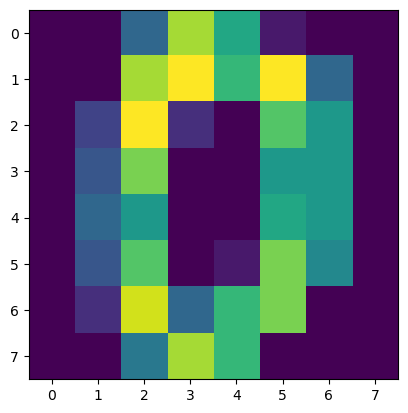

In [15]:
import matplotlib.pyplot as plt
img = x[0].reshape(8,8)
plt.imshow(img)

In [7]:
from sklearn.model_selection import train_test_split
train_feature,test_feature,train_label,test_label = train_test_split(x,y,test_size=0.2,random_state=666)

# 使用投票法选出k个样本 

In [8]:
def knn_clf(k,train_feature,train_label,test_feature):
    '''
    input:
        k(int):最近邻样本个数
        train_feature(ndarray):训练样本特征
        train_label(ndarray):训练样本标签
        test_feature(ndarray):测试样本特征
    output:
        predict(ndarray):测试样本预测标签
    '''
    #初始化predict 
    predict = np.zeros(test_feature.shape[0]).astype('int')
    #对每个测试样本使用knn算法
    for i in range(test_feature.shape[0]):
        dis = np.linalg.norm(test_feature[i]-train_feature,axis = 1)
        dis_k = np.sort(dis)[0:k]#前k个样本的距离列表
        idx_k = np.argsort(dis)[0:k]#这里我们选取测试集中的样本，它与训练样本是没关系的。因此在这里取前k个样本的索引
        nearnest_k = [train_label[j] for j in idx_k]#距离最近的k个样本的标签列表
        votes = {}
        max = 0
        for m,n in enumerate(nearnest_k):
            if n in votes.keys():
                votes[n] += 1/(dis_k[m]+1e-10)
                if votes[n]>max:
                    max = votes[n]
                    predict[i] = n
            elif n not in votes.keys():
                votes[n] = 1/(dis_k[m]+1e-10)
                max = votes[n]
                predict[i] = n
        
    return predict

(360,)
(1437, 64)
[8 1 3 4 4]
[8 1 3 4 4]


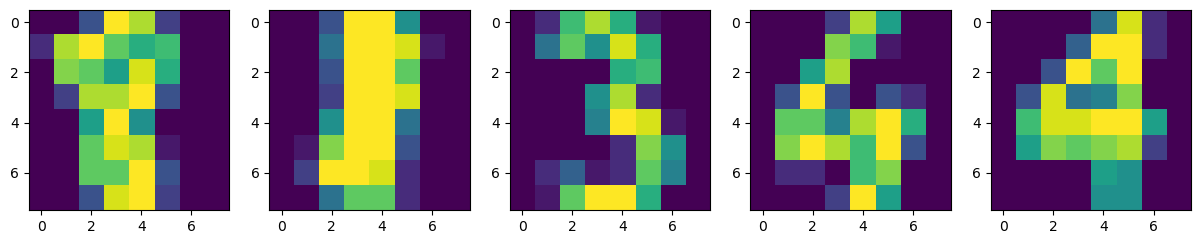

In [10]:
predict = knn_clf(5,train_feature,train_label,test_feature)
print(predict.shape)
print(train_feature.shape)
fig,axes = plt.subplots(1,5,figsize=(15,15))
for i in range(5):
    axes[i].imshow(test_feature[i].reshape(8,8))
print(test_label[0:5])
print(predict[0:5])

K最近邻（KNN）算法的主要时间复杂度集中在两个方面：训练和预测。

1. **训练阶段：** KNN 是一种懒惰学习算法，训练阶段实际上没有明确的训练过程。模型直接存储了所有的训练数据。因此，训练阶段的时间复杂度是 **O(1)**，即常数时间。

2. **预测阶段：** 在预测时，KNN 需要计算待预测点与所有训练集中点的距离，然后选择距离最近的 k 个点进行决策。具体而言，预测阶段的时间复杂度包括以下几个步骤：

   - **计算距离：** 计算待预测点与所有训练集中点的距离。假设训练集有 m 个样本，每个样本有 n 个特征，则计算距离的时间复杂度是 **O(m * n)**。

   - **排序：** 对距离进行排序以找到最近的 k 个邻居。假设选择排序，排序的时间复杂度是 **O(m * log(m))**，因为在 KNN 中一般情况下 k 远小于 m。

   - **决策：** 根据 k 个最近邻的标签进行决策。这一步的时间复杂度可以忽略，因为 k 通常是一个常数。

因此，KNN 算法的预测阶段总体时间复杂度是 **O(m * n + m * log(m))**。需要注意的是，在高维度数据中，由于距离的计算和排序过程会变得更加昂贵，因此在高维数据集上的性能可能较差，这也是 KNN 算法的一个局限性。